In [1]:
import utilities as u
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-deep')

%matplotlib widget

/home/jannik/anaconda3/envs/tf/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Define folder names and how model names should appear
dirs = ["SuperResolution", "Surrogate"]
legends = ["Super-Resolution", "Surrogate Model"]
legends_abbr = ["SR", "SUR"]
variables = ["Hs", "Tm02", "Dir"]
markers = ["o", "s"]
units = {0: "[m]", 1: "[s]", 2: "[°]"}

# Used to plot the mean in the same color
colors = sns.color_palette()

# Plot performances with their means
The plot only shows one data instance per variable, since only the worst
model weights were provided.

Contact jannik.kuehn@outlook.de for the other model weights.

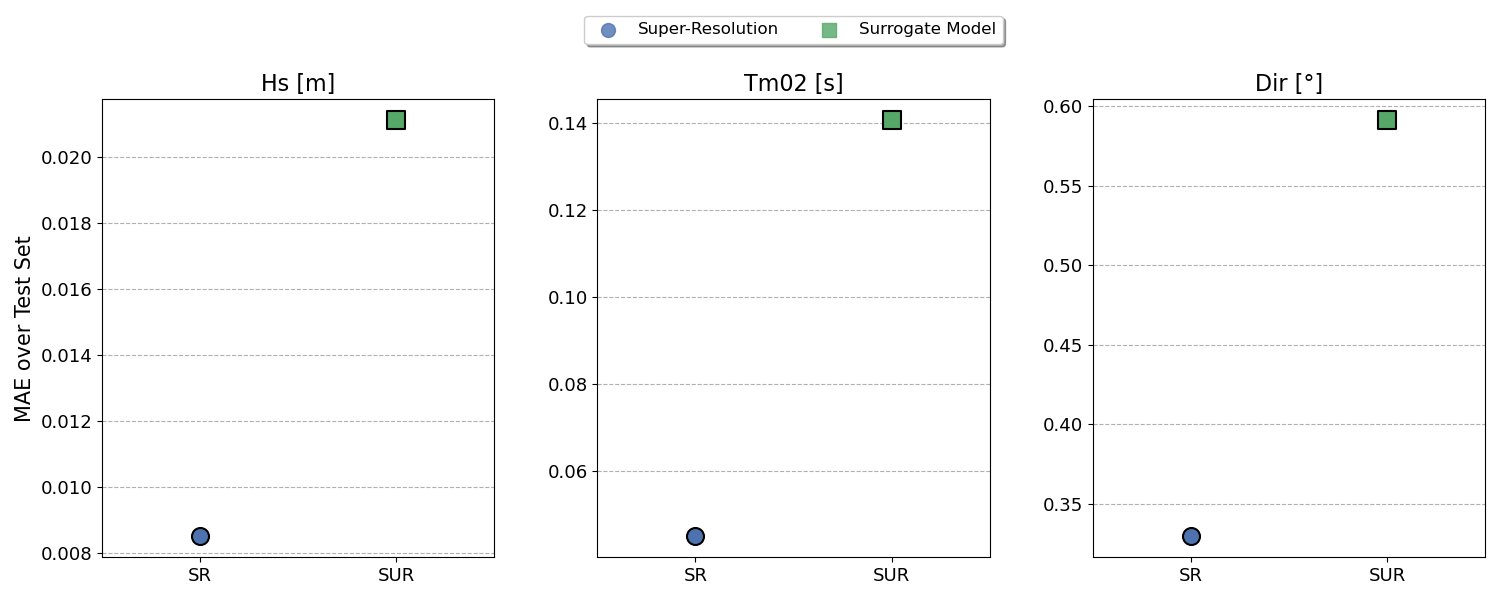

In [3]:
LABELSIZE = 15
TITLESIZE = 16
TICKLABELSIZE = 13
LEGENDFONTSIZE = 12

fig, axs = plt.subplots(1, len(variables), figsize=(15,6))
for i, var in enumerate(variables):
    for j, dr in enumerate(dirs):
        # Get the performance on test data from summary files 
        evals, _ = u.extract_time_and_eval(dr, var)
        # Compute the corresponding means and plot them
        axs[i].scatter(len(evals)*[j], evals, color=colors[j], label=legends[j],
                       marker=markers[j], s=100, alpha=0.8)
        mean_evals = sum(evals)/len(evals)
        axs[i].scatter([j], mean_evals, color=colors[j], marker=markers[j],
                       edgecolor="k", linewidth=1.5, s=150)
        
        
    axs[i].tick_params(axis="both", labelsize=TICKLABELSIZE)
    axs[i].grid(True, axis="y", ls="--")
    axs[i].set_xlim(-0.5, 1.5)
    axs[i].set_axisbelow(True)
    axs[i].set_xticks([0, 1])
    axs[i].set_xticklabels(legends_abbr)
    axs[i].set_title("{} {}".format(var, units[i]), size=TITLESIZE)
    
    
axs[0].set_ylabel("MAE over Test Set", size=LABELSIZE)
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=2, fontsize=LEGENDFONTSIZE)

plt.tight_layout()
plt.show()